In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
dataset = load_diabetes()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y =dataset.target

In [15]:
# Create binary classes: 1 if above median, else 0
y = (y > np.median(y)).astype(int)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [25]:
y_pred = lda.predict(X_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7744360902255639

Confusion Matrix:
 [[56 16]
 [14 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        72
           1       0.75      0.77      0.76        61

    accuracy                           0.77       133
   macro avg       0.77      0.77      0.77       133
weighted avg       0.78      0.77      0.77       133



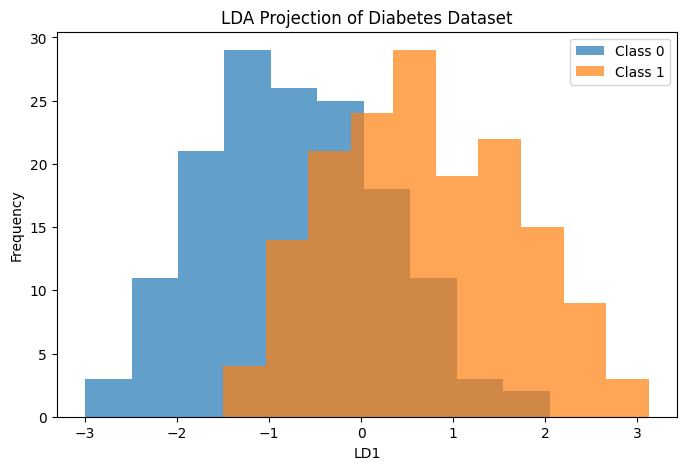

In [31]:
# Transform features into LDA space
X_lda = lda.transform(X_train)

plt.figure(figsize=(8,5))
plt.hist(X_lda[y_train==0], alpha=0.7, label="Class 0")
plt.hist(X_lda[y_train==1], alpha=0.7, label="Class 1")
plt.title("LDA Projection of Diabetes Dataset")
plt.xlabel("LD1")
plt.ylabel("Frequency")
plt.legend()
plt.show()